In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [4]:
d1=pd.read_csv('EURJPY.csv',index_col="Date",parse_dates=True)
d1.head()

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-09 00:00:00,130.077,130.175,130.046,130.125,4.8,0.04
2021-07-08 23:45:00,130.112,130.130,130.050,130.077,-3.5,-0.03
2021-07-08 23:30:00,130.073,130.130,130.072,130.113,4.0,0.03
2021-07-08 23:15:00,130.050,130.058,130.035,130.047,-0.3,0.00
2021-07-08 23:00:00,130.040,130.063,130.033,130.051,1.1,0.01


In [5]:
d1.isna().sum()

Open            0
High            0
Low             0
Close           0
Change(Pips)    0
Change(%)       0
dtype: int64

In [7]:
d1.shape

(385, 6)

In [8]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 385 entries, 2021-07-09 00:00:00 to 2021-07-05 00:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          385 non-null    float64
 1   High          385 non-null    float64
 2   Low           385 non-null    float64
 3   Close         385 non-null    float64
 4   Change(Pips)  385 non-null    float64
 5   Change(%)     385 non-null    float64
dtypes: float64(6)
memory usage: 21.1 KB


In [9]:
d1.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,130.889421,130.921003,130.850584,130.885623,-0.379740,-0.002779
std,0.623335,0.616694,0.633185,0.622749,4.750187,0.036412
min,129.698000,129.783000,129.625000,129.700000,-23.000000,-0.170000
25%,130.417000,130.455000,130.381000,130.415000,-3.000000,-0.020000
50%,130.809000,130.834000,130.772000,130.807000,0.000000,0.000000
75%,131.603000,131.622000,131.581000,131.603000,1.800000,0.010000
max,131.836000,131.863000,131.812000,131.837000,20.100000,0.150000


<AxesSubplot:xlabel='Date'>

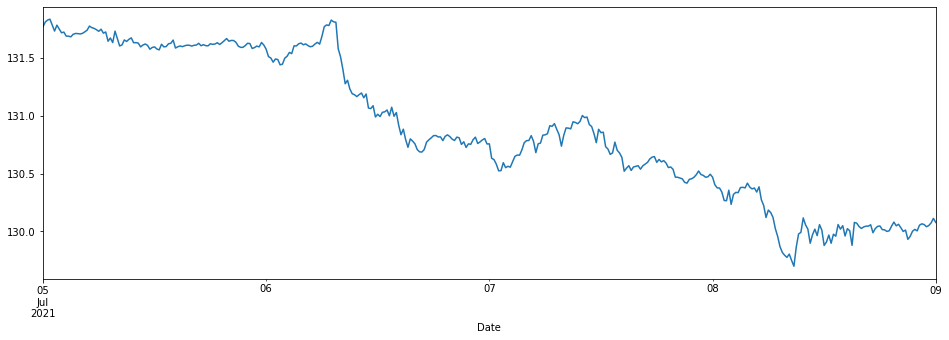

In [10]:
d1['Open'].plot(figsize=(16,5))

In [12]:
#7 day rolling mean
d1.rolling(7).mean().head(10)

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 22:30:00,130.068000,130.100571,130.045000,130.072429,0.442857,0.002857
2021-07-08 22:15:00,130.064571,130.085429,130.045857,130.064286,-0.028571,-0.001429
2021-07-08 22:00:00,130.049143,130.075857,130.038143,130.061143,1.200000,0.008571


<AxesSubplot:xlabel='Date'>

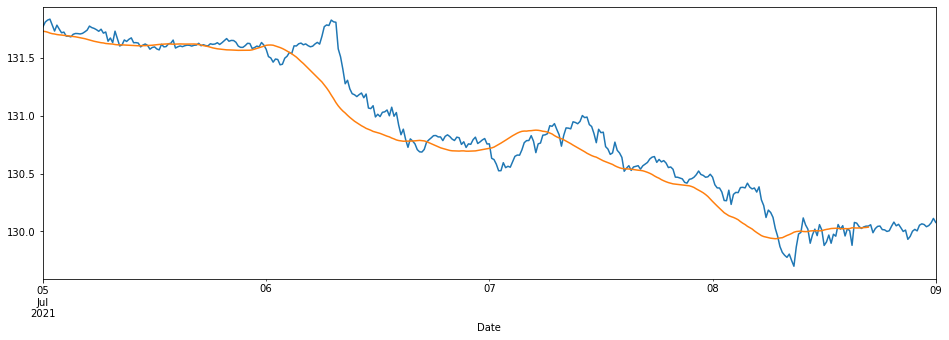

In [13]:
d1['Open'].plot(figsize=(16,5))
d1.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

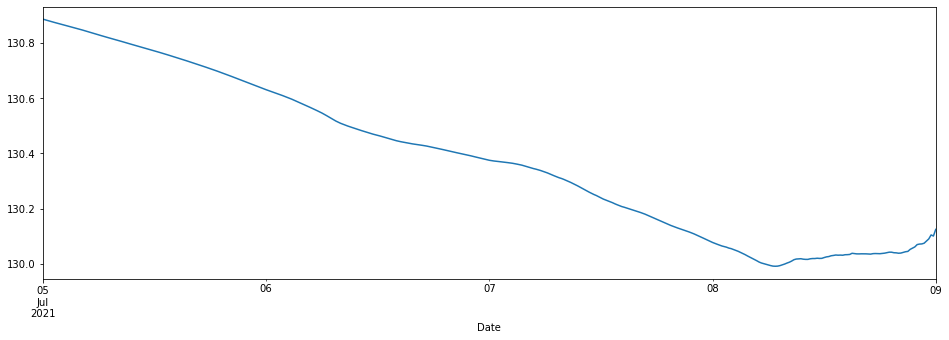

In [14]:
#optional specify a minimum number of periods
d1['Close'].expanding(min_periods=1).mean().plot(figsize=(16,5))

# Peaks and Valley

In [60]:
# data with peaks:
x=np.linspace(-1,3,1000)
data=-0.1*np.cos(12*x)+np.exp(-(1-x)**2)

In [61]:
#detection of local minimums and maximums:
a=np.diff(np.sign(np.diff(data))).nonzero()[0] + 1 # local min & max
b=(np.diff(np.sign(np.diff(data))) > 0).nonzero()[0]+1 #local min
c=(np.diff(np.sign(np.diff(data))) < 0).nonzero()[0]+1 #local max

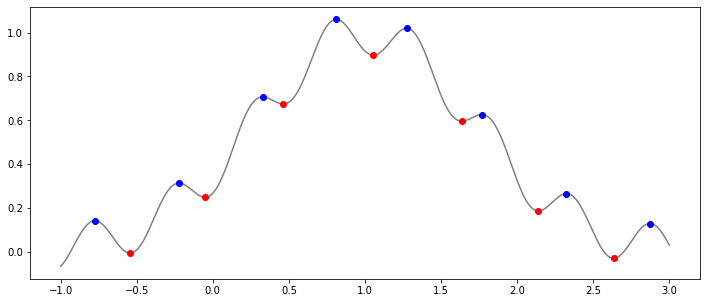

In [62]:
# plot
plt.figure(figsize=(12, 5))
plt.plot(x, data, color='grey')
plt.plot(x[b], data[b], "o", label="min", color='r')
plt.plot(x[c], data[c], "o", label="max", color='b')
plt.show()

# Correlation

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [26]:
d1['Close'].describe()

count    385.000000
mean     130.885623
std        0.622749
min      129.700000
25%      130.415000
50%      130.807000
75%      131.603000
max      131.837000
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

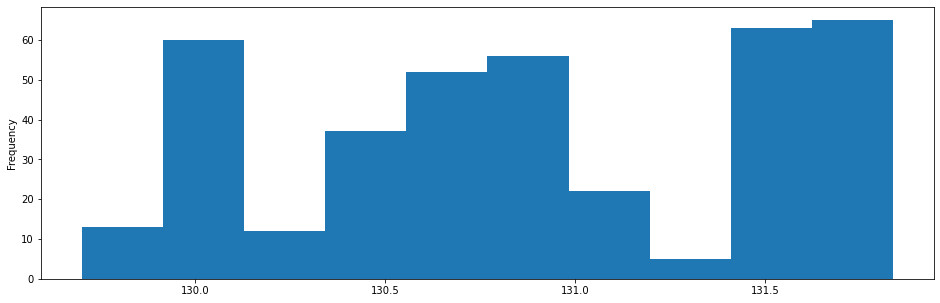

In [27]:
plt.figure(figsize=(16,5))
d1['Close'].plot(kind="hist")

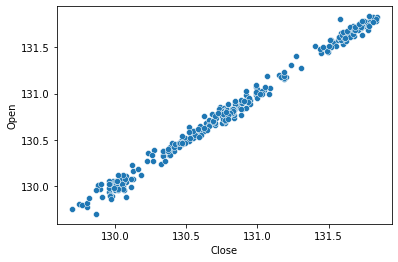

In [34]:
sns.scatterplot(x="Close",y="Open",data=d1);

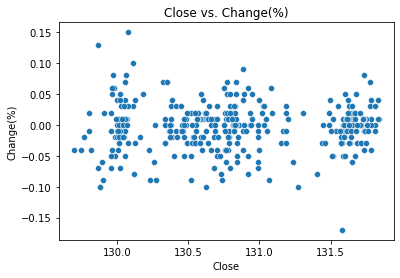

In [36]:
ax=sns.scatterplot(x="Close",y="Change(%)",data=d1)
ax.set_title("Close vs. Change(%)")
ax.set_xlabel("Close");

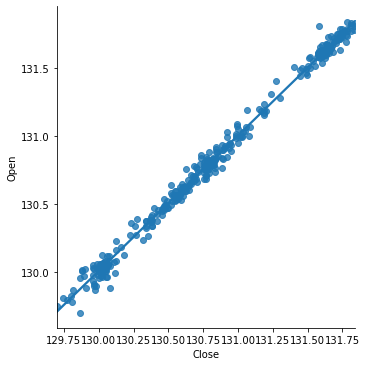

In [37]:
# adding best fit line
sns.lmplot(x="Close",y="Open",data=d1);

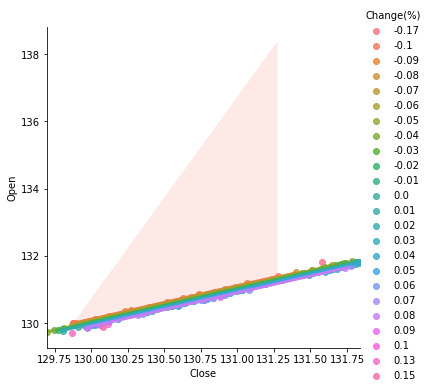

In [38]:
sns.lmplot(x="Close",y="Open",hue="Change(%)",data=d1)

In [40]:
#coofficient of correlation
from scipy import stats
stats.pearsonr(d1['Open'],d1['Close'])

(0.9970940338428821, 0.0)

In [47]:
#correlation matrix
d=d1.corr()
round(d,2)

,Open,High,Low,Close,Change(Pips),Change(%)
Open,1.00,1.00,1.0,1.00,-0.05,-0.05
High,1.00,1.00,1.0,1.00,-0.02,-0.01
Low,1.00,1.00,1.0,1.00,-0.00,0.00
Close,1.00,1.00,1.0,1.00,0.03,0.03
Change(Pips),-0.05,-0.02,-0.0,0.03,1.00,1.00
Change(%),-0.05,-0.01,0.0,0.03,1.00,1.00


<AxesSubplot:ylabel='Count'>

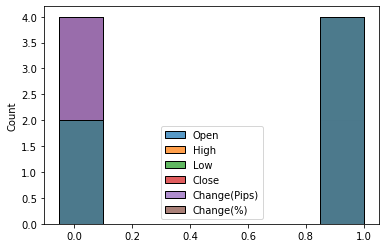

In [43]:
#correlation matrix to histogram
sns.histplot(d)

<AxesSubplot:>

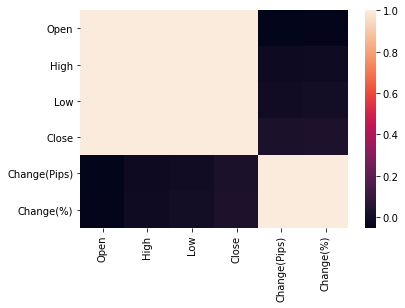

In [48]:
sns.heatmap(d)

In [55]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.Collecting plotly



# Dataset 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [4]:
d2=pd.read_csv('EURUSD.csv',index_col="Date",parse_dates=True)
d2.head()

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-09 00:00:00,1.18466,1.18494,1.18449,1.18473,0.7,0.01
2021-07-08 23:45:00,1.18471,1.18478,1.18459,1.18463,-0.8,-0.01
2021-07-08 23:30:00,1.18438,1.18478,1.18436,1.18471,3.3,0.03
2021-07-08 23:15:00,1.18422,1.18426,1.18406,1.18426,0.4,0.00
2021-07-08 23:00:00,1.18454,1.18464,1.18415,1.18424,-3.0,-0.03


In [5]:
d2.isna().sum()

Open            0
High            0
Low             0
Close           0
Change(Pips)    0
Change(%)       0
dtype: int64

In [6]:
d2.shape

(385, 6)

In [7]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 385 entries, 2021-07-09 00:00:00 to 2021-07-05 00:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          385 non-null    float64
 1   High          385 non-null    float64
 2   Low           385 non-null    float64
 3   Close         385 non-null    float64
 4   Change(Pips)  385 non-null    float64
 5   Change(%)     385 non-null    float64
dtypes: float64(6)
memory usage: 21.1 KB


In [9]:
d2.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,1.183648,1.183909,1.183360,1.183646,-0.013247,-0.000182
std,0.002671,0.002663,0.002687,0.002669,3.986214,0.033961
min,1.178480,1.178770,1.178150,1.178470,-17.800000,-0.150000
25%,1.181950,1.182170,1.181600,1.181980,-1.900000,-0.020000
50%,1.183840,1.184090,1.183610,1.183830,0.000000,0.000000
75%,1.186060,1.186390,1.185860,1.186080,2.100000,0.020000
max,1.189350,1.189540,1.189020,1.189390,16.400000,0.140000


<AxesSubplot:xlabel='Date'>

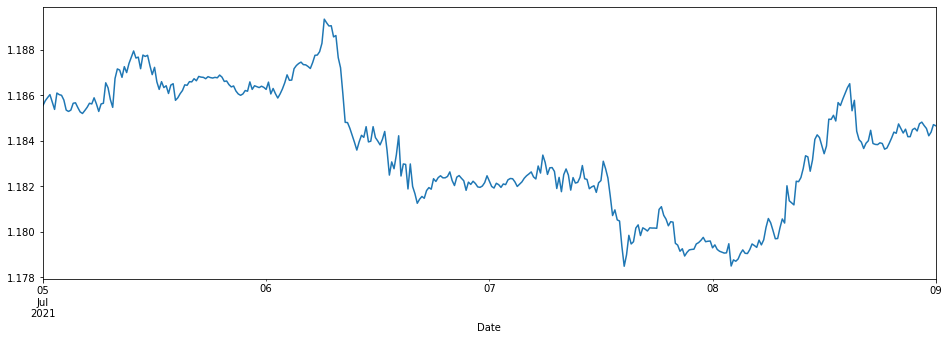

In [10]:
d2['Open'].plot(figsize=(16,5))

In [11]:
#7 day rolling mean
d2.rolling(7).mean().head(10)

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 22:30:00,1.184571,1.184714,1.184394,1.184536,-0.357143,-0.004286
2021-07-08 22:15:00,1.184584,1.184706,1.184430,1.184550,-0.342857,-0.004286
2021-07-08 22:00:00,1.184544,1.184716,1.184406,1.184567,0.228571,0.001429


<AxesSubplot:xlabel='Date'>

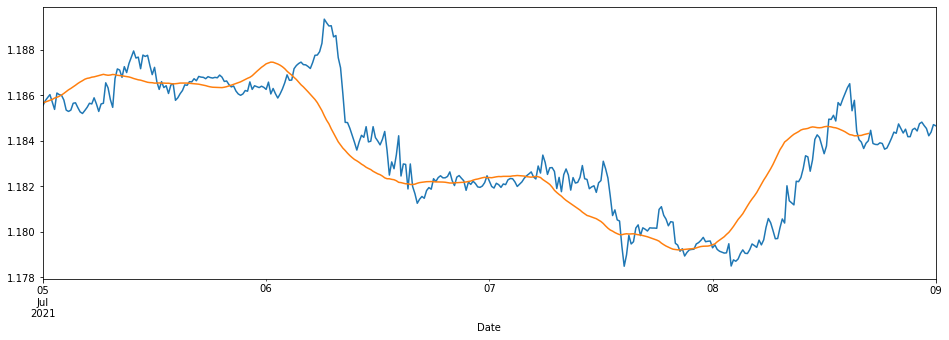

In [12]:
d2['Open'].plot(figsize=(16,5))
d2.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

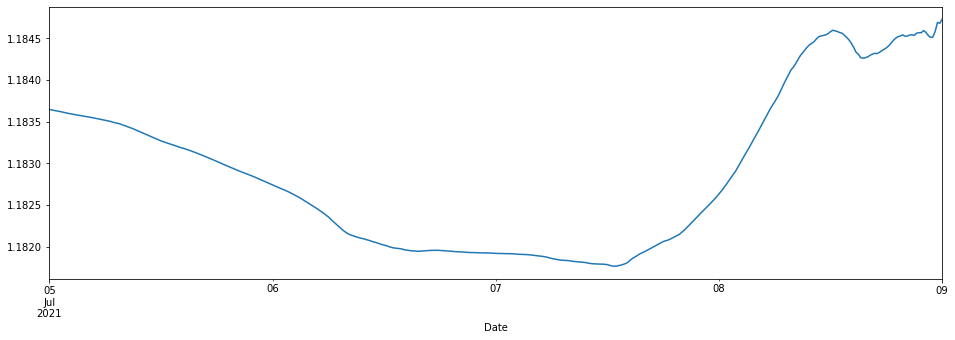

In [13]:
#optional specify a minimum number of periods
d2['Close'].expanding(min_periods=1).mean().plot(figsize=(16,5))

# Peaks and Valley

In [14]:
# data with peaks:
x=np.linspace(1,3,1000)
data=-0.1*np.cos(12*x)+np.exp(-(1-x)**2)

In [15]:
#detection of local minimums and maximums:
e=np.diff(np.sign(np.diff(data))).nonzero()[0] + 1 # local min & max
f=(np.diff(np.sign(np.diff(data))) > 0).nonzero()[0]+1 #local min
g=(np.diff(np.sign(np.diff(data))) < 0).nonzero()[0]+1 #local max

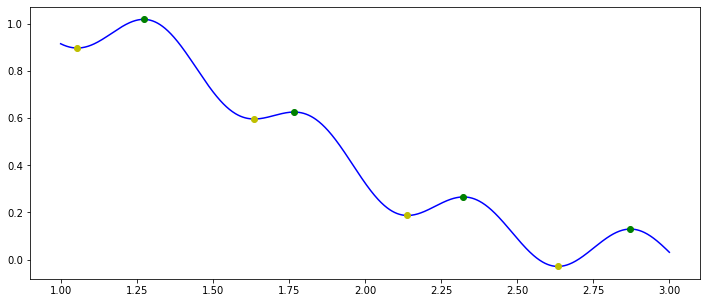

In [32]:
# plot
plt.figure(figsize=(12, 5))
plt.plot(x, data, color='blue')
plt.plot(x[f], data[f], "o", label="min", color='y')
plt.plot(x[g], data[g], "o", label="max", color='g')
plt.show()

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Correlation

In [19]:
d2['Close'].describe()

count    385.000000
mean       1.183646
std        0.002669
min        1.178470
25%        1.181980
50%        1.183830
75%        1.186080
max        1.189390
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

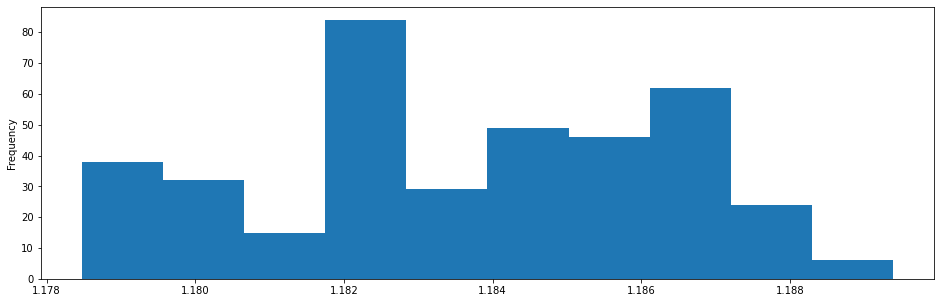

In [20]:
plt.figure(figsize=(16,5))
d2['Close'].plot(kind="hist")

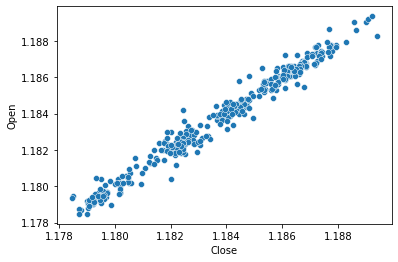

In [28]:
sns.scatterplot(x="Close",y="Open",data=d2);

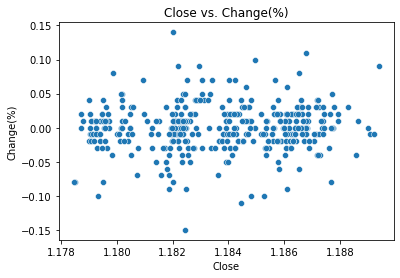

In [22]:
ax=sns.scatterplot(x="Close",y="Change(%)",data=d2)
ax.set_title("Close vs. Change(%)")
ax.set_xlabel("Close");

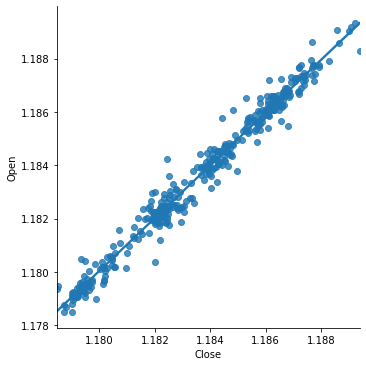

In [23]:
# adding best fit line
sns.lmplot(x="Close",y="Open",data=d2);

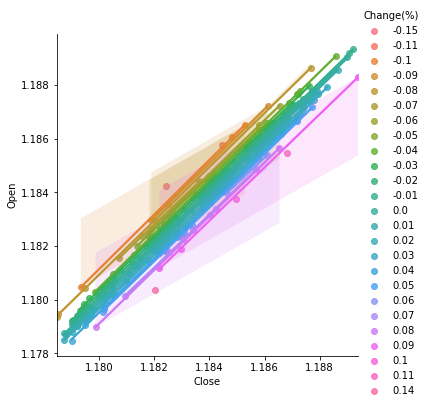

In [24]:
sns.lmplot(x="Close",y="Open",hue="Change(%)",data=d2)

In [62]:
#coofficient of correlation
from scipy import stats
stats.pearsonr(d2['Open'],d2['Close'])

(0.9888562568692829, 6.36653e-319)

In [29]:
#correlation matrix
d=d2.corr()
round(d,2)

,Open,High,Low,Close,Change(Pips),Change(%)
Open,1.00,0.99,0.99,0.99,-0.08,-0.08
High,0.99,1.00,0.99,0.99,-0.01,-0.01
Low,0.99,0.99,1.00,0.99,0.00,0.00
Close,0.99,0.99,0.99,1.00,0.07,0.07
Change(Pips),-0.08,-0.01,0.00,0.07,1.00,1.00
Change(%),-0.08,-0.01,0.00,0.07,1.00,1.00


<AxesSubplot:ylabel='Count'>

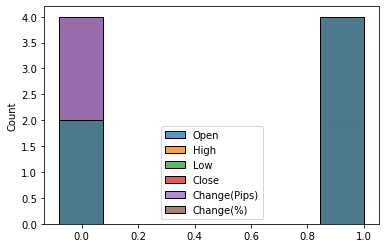

In [30]:
#correlation matrix to histogram
sns.histplot(d)

<AxesSubplot:>

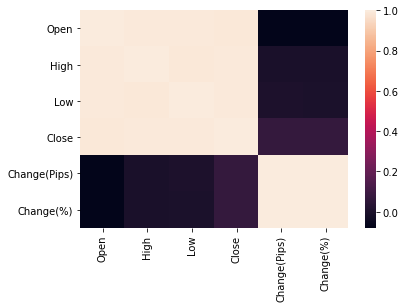

In [31]:
sns.heatmap(d)

# Dataset 3

In [35]:
d3=pd.read_csv('USDJPY.csv',index_col="Date",parse_dates=True)
d3.head()

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-09 00:00:00,109.806,109.878,109.791,109.839,3.3,0.03
2021-07-08 23:45:00,109.826,109.845,109.778,109.803,-2.3,-0.02
2021-07-08 23:30:00,109.818,109.833,109.807,109.822,0.4,0.00
2021-07-08 23:15:00,109.817,109.828,109.808,109.810,-0.7,-0.01
2021-07-08 23:00:00,109.778,109.825,109.776,109.815,3.7,0.03


In [36]:
d3.isna().sum()

Open            0
High            0
Low             0
Close           0
Change(Pips)    0
Change(%)       0
dtype: int64

In [37]:
d3.shape

(385, 6)

In [38]:
d3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 385 entries, 2021-07-09 00:00:00 to 2021-07-05 00:00:00
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          385 non-null    float64
 1   High          385 non-null    float64
 2   Low           385 non-null    float64
 3   Close         385 non-null    float64
 4   Change(Pips)  385 non-null    float64
 5   Change(%)     385 non-null    float64
dtypes: float64(6)
memory usage: 21.1 KB


In [39]:
d3.describe()

,Open,High,Low,Close,Change(Pips),Change(%)
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,110.580343,110.603561,110.553306,110.577013,-0.332987,-0.003039
std,0.406147,0.401732,0.412936,0.407037,3.696173,0.033694
min,109.569000,109.602000,109.535000,109.567000,-17.300000,-0.160000
25%,110.538000,110.562000,110.511000,110.532000,-2.000000,-0.020000
50%,110.654000,110.677000,110.633000,110.653000,-0.100000,0.000000
75%,110.850000,110.874000,110.833000,110.851000,1.600000,0.010000
max,111.165000,111.190000,111.151000,111.165000,12.400000,0.110000


<AxesSubplot:xlabel='Date'>

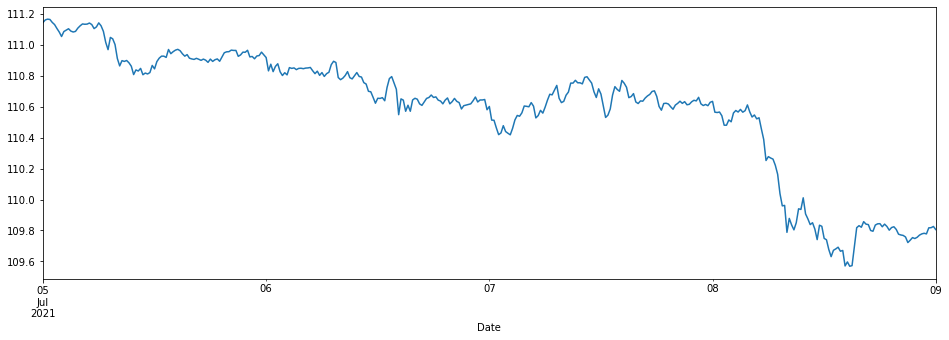

In [40]:
d3['Open'].plot(figsize=(16,5))

In [41]:
#7 day rolling mean
d3.rolling(7).mean().head(10)

,Open,High,Low,Close,Change(Pips),Change(%)
Date,,,,,,
2021-07-09 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:30:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:15:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-08 22:30:00,109.800714,109.827429,109.786143,109.807000,0.628571,0.004286
2021-07-08 22:15:00,109.795571,109.813286,109.782571,109.798143,0.257143,0.001429
2021-07-08 22:00:00,109.785571,109.804429,109.778714,109.793857,0.828571,0.007143


<AxesSubplot:xlabel='Date'>

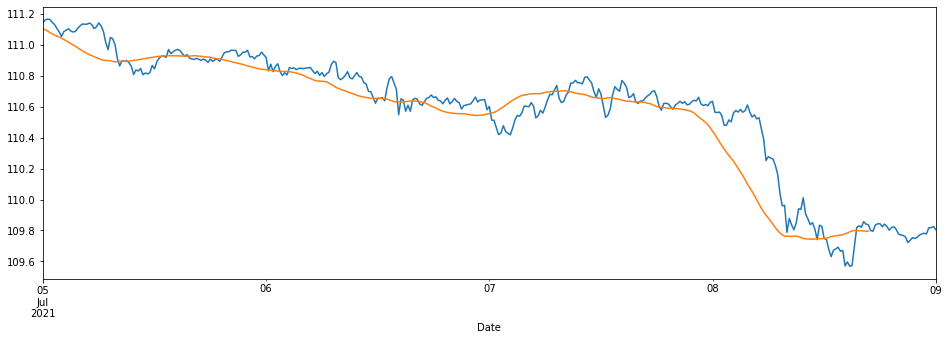

In [42]:
d3['Open'].plot(figsize=(16,5))
d3.rolling(window=30).mean()['Close'].plot()

<AxesSubplot:xlabel='Date'>

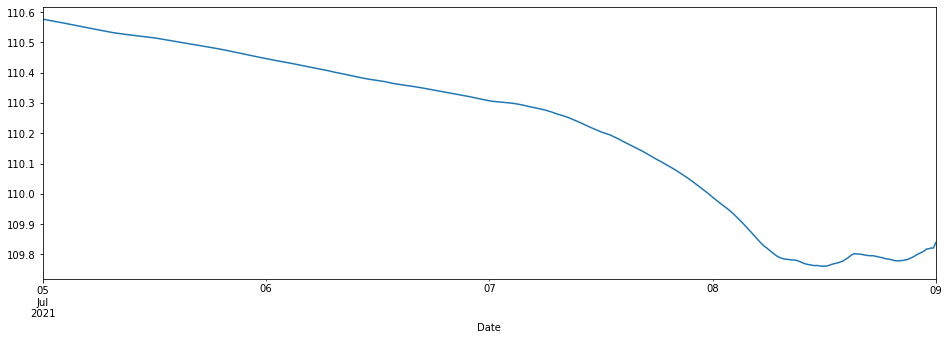

In [43]:
#optional specify a minimum number of periods
d3['Close'].expanding(min_periods=1).mean().plot(figsize=(16,5))

# Peaks and Valley


In [54]:
# data with peaks:
x=np.linspace(1,3,1000)
data=-0.1*np.cos(12*x)+np.exp(-(1-x)**2)

In [55]:
#detection of local minimums and maximums:
h=np.diff(np.sign(np.diff(data))).nonzero()[0] + 1 # local min & max
i=(np.diff(np.sign(np.diff(data))) > 0).nonzero()[0]+1 #local min
j=(np.diff(np.sign(np.diff(data))) < 0).nonzero()[0]+1 #local max

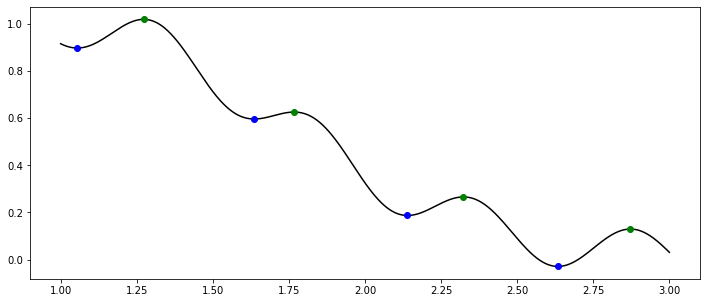

In [56]:
# plot
plt.figure(figsize=(12, 5))
plt.plot(x, data, color='black')
plt.plot(x[i], data[i], "o", label="min", color='b')
plt.plot(x[j], data[j], "o", label="max", color='g')
plt.show()

# Correlation

In [48]:
d3['Close'].describe()

count    385.000000
mean     110.577013
std        0.407037
min      109.567000
25%      110.532000
50%      110.653000
75%      110.851000
max      111.165000
Name: Close, dtype: float64

<AxesSubplot:ylabel='Frequency'>

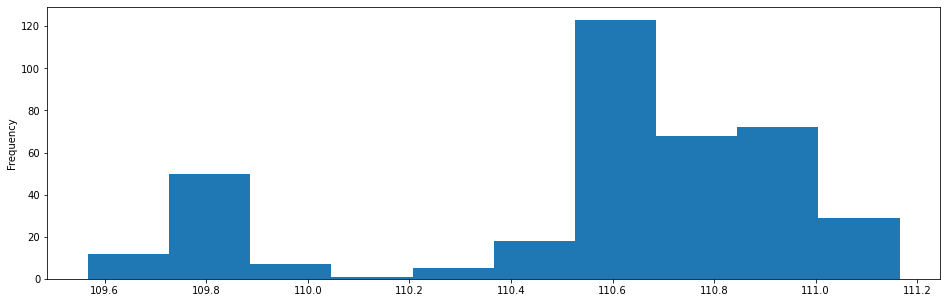

In [49]:
plt.figure(figsize=(16,5))
d3['Close'].plot(kind="hist")

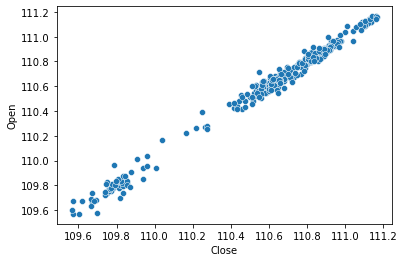

In [50]:
sns.scatterplot(x="Close",y="Open",data=d3);

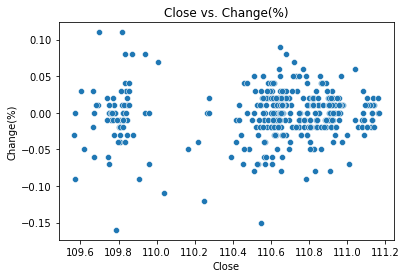

In [51]:
ax=sns.scatterplot(x="Close",y="Change(%)",data=d3)
ax.set_title("Close vs. Change(%)")
ax.set_xlabel("Close");

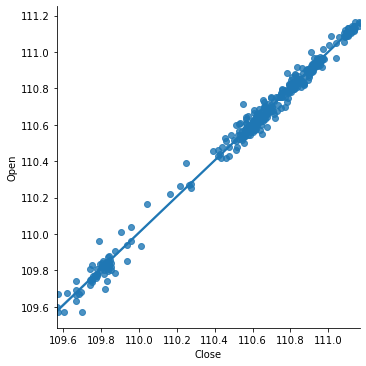

In [52]:
# adding best fit line
sns.lmplot(x="Close",y="Open",data=d3);

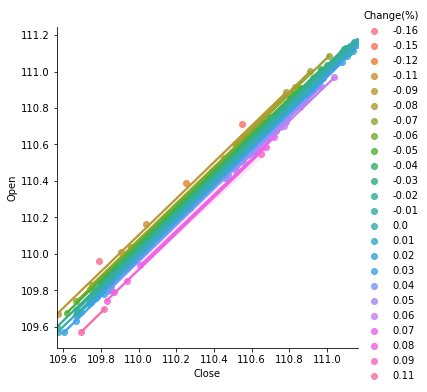

In [53]:
sns.lmplot(x="Close",y="Open",hue="Change(%)",data=d3)

In [57]:
#coofficient of correlation
stats.pearsonr(d3['Open'],d3['Close'])

(0.9958704200464453, 0.0)

In [58]:
#correlation matrix
d=d3.corr()
round(d,2)

,Open,High,Low,Close,Change(Pips),Change(%)
Open,1.00,1.00,1.00,1.00,-0.02,-0.02
High,1.00,1.00,1.00,1.00,0.02,0.02
Low,1.00,1.00,1.00,1.00,0.04,0.04
Close,1.00,1.00,1.00,1.00,0.07,0.07
Change(Pips),-0.02,0.02,0.04,0.07,1.00,1.00
Change(%),-0.02,0.02,0.04,0.07,1.00,1.00


<AxesSubplot:ylabel='Count'>

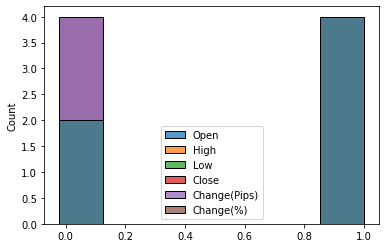

In [59]:
#correlation matrix to histogram
sns.histplot(d)

<AxesSubplot:>

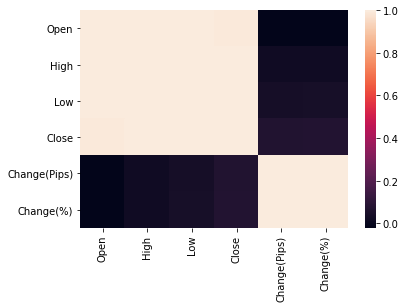

In [60]:
sns.heatmap(d)